In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statistics
import glob
import time

import analysis_pkg
%load_ext autoreload
%autoreload 2

In [2]:
start_time = time.time()
mod_fit = analysis_pkg.fit_spec_years(2013,2018)
print(" %s min" % round(((time.time() - start_time)/60), 2))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   35.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
-0.38352845914949873
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.7s finished
0.37749117544166283
 3.96 min


In [4]:
start_time = time.time()
sex_sep, sex_full, cat_full = analysis_pkg.singleyear_multibase_analysis(2018, mod_fit)
print(" %s min" % round(((time.time() - start_time)/60), 2))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
 0.2 min


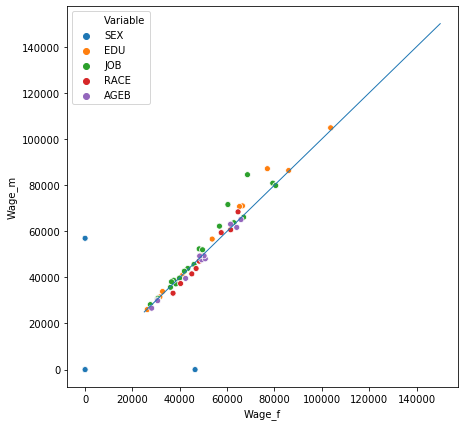

In [26]:
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x="Wage_f", y="Wage_m", hue="Variable",data=sex_sep)
plt.plot([25000,150000], [25000,150000], linewidth=1)

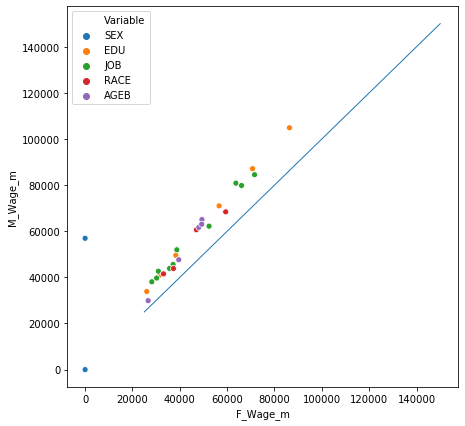

In [21]:
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x="F_Wage_m", y="M_Wage_m", hue="Variable",data=sex_full)
plt.plot([25000,150000], [25000,150000], linewidth=1)

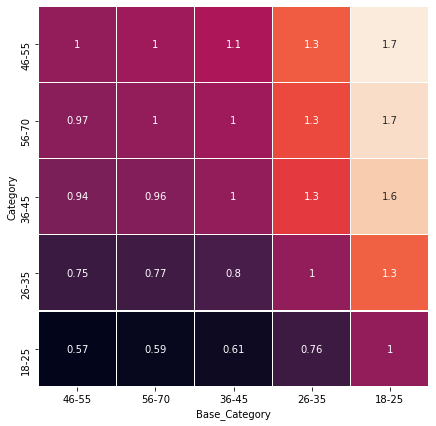

In [27]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'AGEB')

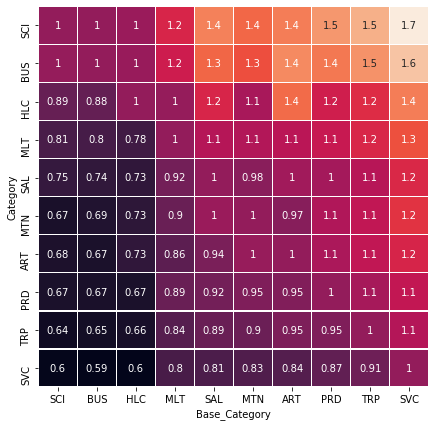

In [17]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'JOB')

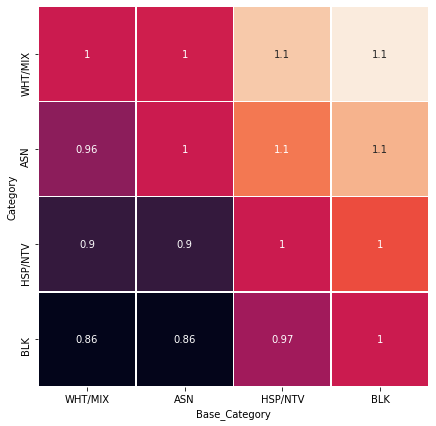

In [32]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'RACE')

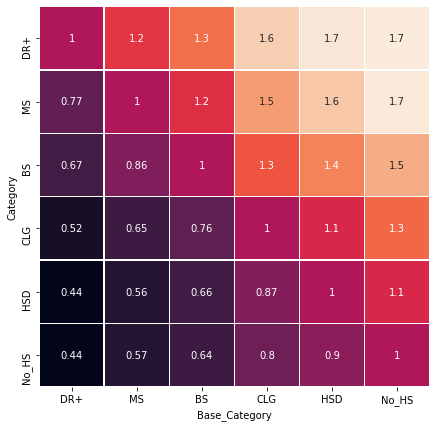

In [33]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'EDU')

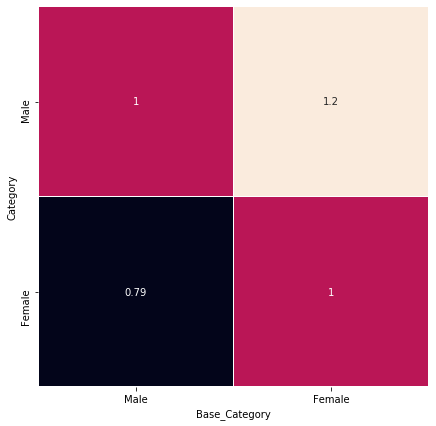

In [34]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'SEX')

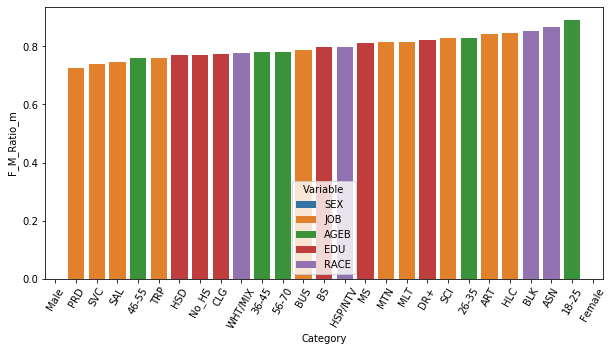

In [31]:
sex_full_sort = sex_full.sort_values(by=['F_M_Ratio_m'])
sex_full_list = sex_full_sort['Category'].tolist()
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
g = sns.barplot(y="F_M_Ratio_m", x="Category", dodge = False,
                hue='Variable', data=sex_full_sort)